In [3]:
import numpy as np
import pandas as pd
np.random.seed(1)

df = pd.DataFrame(np.random.randn(4, 4)*4 + 3)
df

,0,1,2,3
0,9.497381,0.552974,0.887313,-1.291874
1,6.461631,-6.206155,9.979247,-0.044828
2,4.276156,2.002518,8.848432,-5.240563
3,1.710331,1.463783,7.535078,-1.399565


# 离差标准化
# 对列做统一的线性变化 
$ X-min/(max-min) $

In [4]:
df_norm=(df-df.min())/(df.max()-df.min())
df_norm

,0,1,2,3
0,1.000000,0.823413,0.000000,0.759986
1,0.610154,0.000000,1.000000,1.000000
2,0.329499,1.000000,0.875624,0.000000
3,0.000000,0.934370,0.731172,0.739260


# 标准差标准化
符合正态分布的变成标准正态分布

减去平均值，除以标准差

标准正态分布即曲线图象对称轴为Y轴，标准差σ=1条件下的正态分布，

In [5]:
df_norm1=(df-df.mean())/(df.std())
df_norm1

,0,1,2,3
0,1.213741,0.287871,-1.454237,0.312166
1,0.295115,-1.481492,0.777218,0.866440
2,-0.366215,0.667324,0.499679,-1.442906
3,-1.142640,0.526297,0.177340,0.264301


# 转化数据
- 类别型转化成数值型 -离散化类别型数据
- 数值型转化为类别型 -离散化数据型数据

In [26]:
# 哑变量转换
df = pd.DataFrame([  
            ['green','M','10.2','class1'],
            ['red','L','13.5','class2'],  
            ['blue','XL','15.3','class1'],  
           ])  
df.columns = ['color','size','prize','class label'] 
df

,color,size,prize,class label
0,green,M,10.2,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [27]:
size_mapping={'M':1,'L':2,'XL':3}
df['size']=df['size'].map(size_mapping)
df

,color,size,prize,class label
0,green,1,10.2,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [29]:
# one-hot
class_mapping={label:idx for idx,label in enumerate(set(df['class label']))}
class_mapping  # {'class1':0,'class2':1}
df['class label']=df['class label'].map(class_mapping)
df

,color,size,prize,class label
0,green,1,10.2,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [30]:
# 哑变量：虚拟变量——》得到稀疏矩阵
df=pd.get_dummies(df,columns=['color'])
df

,size,prize,class label,color_blue,color_green,color_red
0,1,10.2,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


# 离散化数据：把连续性的数据变成类别型
- 比如把年龄划分为区间。

In [32]:
ages=[20,22,34,56,34,12,9,43,23,18,45]
bins=[5,10,15,20,25,30,40,45,50,60] # 每两个数为一个区间 #自己定义就可以不等距

In [33]:
cut_data1=pd.cut(x=ages,bins=5)
cut_data1 # 划分为5个等宽的区间

[(18.4, 27.8], (18.4, 27.8], (27.8, 37.2], (46.6, 56.0], (27.8, 37.2], ..., (8.953, 18.4], (37.2, 46.6], (18.4, 27.8], (8.953, 18.4], (37.2, 46.6]]
Length: 11
Categories (5, interval[float64]): [(8.953, 18.4] < (18.4, 27.8] < (27.8, 37.2] < (37.2, 46.6] < (46.6, 56.0]]

In [34]:
cut_data2=pd.cut(x=ages,bins=bins)
cut_data2

[(15, 20], (20, 25], (30, 40], (50, 60], (30, 40], ..., (5, 10], (40, 45], (20, 25], (15, 20], (40, 45]]
Length: 11
Categories (9, interval[int64]): [(5, 10] < (10, 15] < (15, 20] < (20, 25] ... (30, 40] < (40, 45] < (45, 50] < (50, 60]]

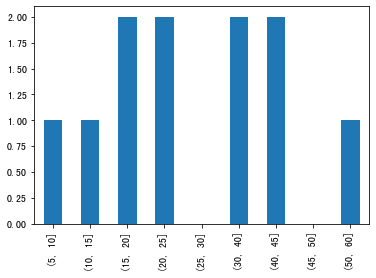

In [36]:
cut_data2.value_counts().plot(kind='bar')